In [ ]:
%cd ..

import os
import urllib.request
from zipfile import ZipFile
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from src.model.neural_network import NeuralNetwork
from src.utils.plots import plot_epochs_history
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=200)

In [2]:
X = np.arange(0, 10, 0.1)

y = np.sin(X)

X = X.reshape(X.shape[0], 1)
y = y.reshape(y.shape[0], 1)

# shuffle the training dataset
keys = np.array(range(X.shape[0]))
np.random.shuffle(keys)
X = X[keys]
y = y[keys]


In [3]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
start_params = dict(input_shape = X_train.shape[1], output_n_neurons = y_train.shape[1], output_activation='linear', accuracy= 'regression_mae')

model = NeuralNetwork(**start_params)

# add layers
params = dict(loss = 'mean_squared_error', optimizer = 'adam', 
        epochs = 1000, batch_size = None,        
        n_layers = 2, n_neurons = 100, 
        learning_rate = 0.001)

model.set_params(**params)

model.fit(X, y, validation_data=(X_val, y_val), print_every_n_steps=100)

### Plot accumulated epoch losses and validation losses

The validation loss (in **orange**) usually starts smaller than the epoch losses because the values used to calculate the epoch loss are computed before the parameter update and the validation loss is computed after all parameter updates of the epoch.

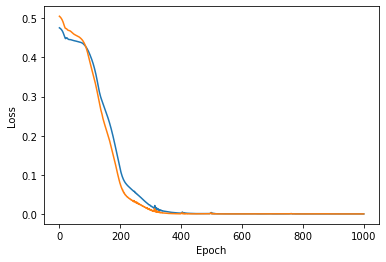

In [5]:
plot_epochs_history([model.accumulated_epoch_losses, model.validation_epoch_losses], 'Loss')

In [6]:
model.evaluate(X, y)

0-> Acc: -0.003 Loss: 0.000


(1.2292260850183073e-05, -0.0032778366090759786)

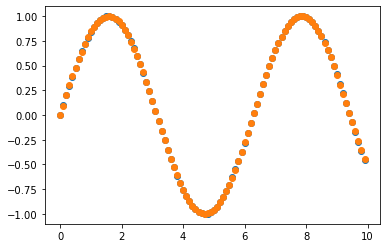

In [7]:
pred = model.predict(X)

plt.scatter(X, y)
plt.scatter(X, pred)
plt.show()

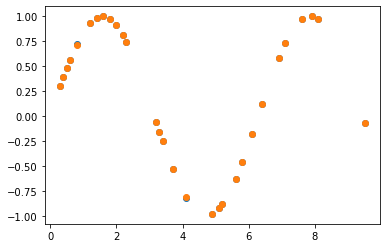

In [8]:
pred_val = model.predict(X_val)

plt.scatter(X_val, y_val)
plt.scatter(X_val, pred_val)
plt.show()

In [9]:
model.predict(X)

array([[ 7.13716809e-01],
       [ 9.59749324e-02],
       [-9.58726322e-01],
       [ 7.91376363e-01],
       [-9.26008701e-01],
       [-5.52948650e-01],
       [ 8.52752682e-01],
       [ 1.42845677e-01],
       [ 8.91460165e-01],
       [ 7.26359368e-01],
       [-1.81334724e-01],
       [ 9.65396477e-01],
       [-5.30391104e-01],
       [ 9.88796440e-01],
       [ 1.17645090e-01],
       [-9.82398084e-01],
       [-7.07480932e-01],
       [ 6.72817288e-01],
       [ 9.99545825e-01],
       [ 5.16994857e-01],
       [ 9.93232057e-01],
       [ 3.12775107e-01],
       [ 9.70058621e-01],
       [-3.54542510e-01],
       [-8.27233191e-02],
       [-7.56885370e-01],
       [ 9.06966331e-01],
       [-9.92636340e-01],
       [ 2.00757383e-04],
       [ 4.92350845e-01],
       [ 4.78551199e-01],
       [ 9.68393237e-01],
       [ 3.06520130e-01],
       [ 5.64717827e-01],
       [-9.78018226e-01],
       [ 6.63001612e-01],
       [ 7.31694830e-01],
       [-1.65667470e-01],
       [-6.1

In [10]:
model.save_model('regression.model')

In [11]:
model = NeuralNetwork.load('regression.model')

model.evaluate(X_val, y_val)

0-> Acc: -0.002 Loss: 0.000


(3.639112788838398e-06, -0.0020832619351944933)